In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('dataset.csv')
X = df.drop(columns=['Activity'])
y = df['Activity']

# balanced_accuracy = (recall + specificity) / 2
# roc_auc_ovr = ROC AUC OneVsRest (sensitive to class imbalance)
# roc_auc_ovo = ROC AUC OneVsOne (insensitive to class imbalance)
metrics = ['f1_weighted', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'accuracy']

## Without pre-process

In [6]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 200

Hidden Layers = 50:
	f1:
		mean = 95.08%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.84%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.77%;
		std = 0.00;
	balanced accuracy:
		mean = 86.53%;
		std = 0.03;
	accuracy:
		mean = 95.12%;
		std = 0.02;
Hidden Layers = 100:
	f1:
		mean = 95.01%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.83%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.73%;
		std = 0.00;
	balanced accuracy:
		mean = 86.05%;
		std = 0.03;
	accuracy:
		mean = 95.06%;
		std = 0.02;
Hidden Layers = 150:
	f1:
		mean = 94.96%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.83%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.75%;
		std = 0.00;
	balanced accuracy:
		mean = 85.28%;
		std = 0.03;
	accuracy:
		mean = 95.00%;
		std = 0.02;
Hidden Layers = 200:
	f1:
		mean = 95.14%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.82%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.74%;
		std = 0.00;
	balanced accuracy:
		mean = 85.93%;
		std = 0.02;
	accuracy:
		mean = 95.18%;
		std = 0.0

## Report

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(200,),
                    random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       587
        LIE_TO_SIT       0.79      0.85      0.81        26
      LIE_TO_STAND       0.80      0.64      0.71        25
           SITTING       0.97      0.95      0.96       540
        SIT_TO_LIE       0.74      0.91      0.82        32
      SIT_TO_STAND       0.77      1.00      0.87        10
          STANDING       0.96      0.97      0.97       594
      STAND_TO_LIE       0.87      0.79      0.82        42
      STAND_TO_SIT       0.93      0.62      0.74        21
           WALKING       1.00      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      1.00      1.00       422
  WALKING_UPSTAIRS       1.00      1.00      1.00       463

          accuracy                           0.98      3279
         macro avg       0.90      0.89      0.89      3279
      weighted avg       0.98      0.98      0.98      3279



In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Única')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)

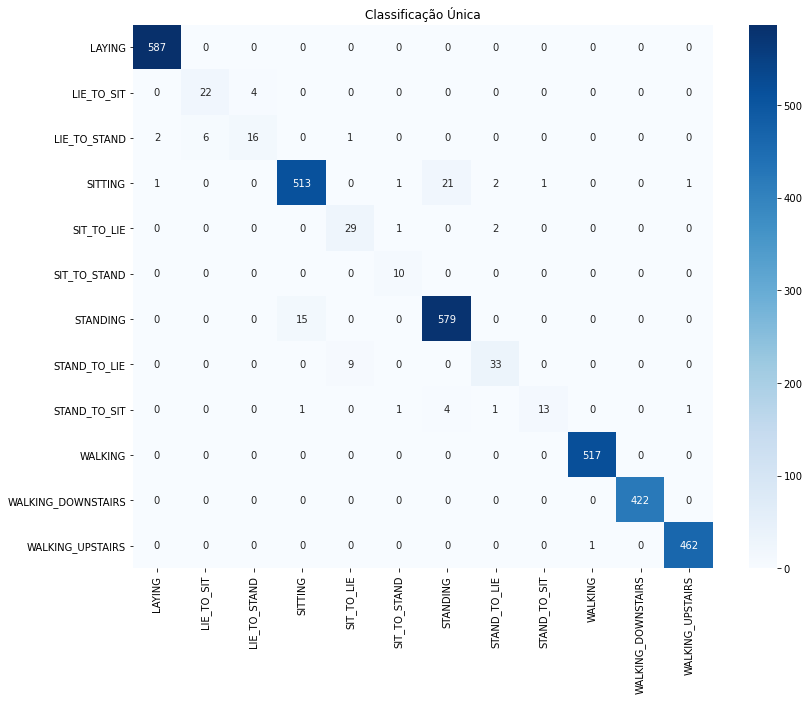

In [5]:
## Standardization

## Standardization

In [13]:
X_std = StandardScaler().fit_transform(X.copy())

for i in range(1,7):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X_std, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: meh

Hidden Layers = 50:
	f1:
		mean = 94.94%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.68%;
		std = 0.00;
	balanced accuracy:
		mean = 87.29%;
		std = 0.03;
	accuracy:
		mean = 94.98%;
		std = 0.02;
Hidden Layers = 100:
	f1:
		mean = 94.94%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.70%;
		std = 0.00;
	balanced accuracy:
		mean = 86.03%;
		std = 0.02;
	accuracy:
		mean = 94.98%;
		std = 0.02;
Hidden Layers = 150:
	f1:
		mean = 94.92%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.72%;
		std = 0.00;
	balanced accuracy:
		mean = 86.69%;
		std = 0.02;
	accuracy:
		mean = 94.96%;
		std = 0.02;
Hidden Layers = 200:
	f1:
		mean = 94.78%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.72%;
		std = 0.00;
	balanced accuracy:
		mean = 87.08%;
		std = 0.02;
	accuracy:
		mean = 94.83%;
		std = 0.0

## Oversampling

In [3]:
for i in range(1,7):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    steps = [StandardScaler(), SMOTE(random_state=42), mpl]
    imba_pipeline = make_pipeline(*steps)

    result = cross_validate(imba_pipeline, X, y, cv=10, scoring=metrics, n_jobs=-1)

    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 250

Hidden Layers = 50:
	f1:
		mean = 94.84%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.77%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.61%;
		std = 0.00;
	balanced accuracy:
		mean = 86.63%;
		std = 0.03;
	accuracy:
		mean = 94.86%;
		std = 0.02;
Hidden Layers = 100:
	f1:
		mean = 94.72%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.66%;
		std = 0.00;
	balanced accuracy:
		mean = 86.47%;
		std = 0.03;
	accuracy:
		mean = 94.76%;
		std = 0.02;
Hidden Layers = 150:
	f1:
		mean = 94.81%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.78%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.65%;
		std = 0.00;
	balanced accuracy:
		mean = 86.36%;
		std = 0.03;
	accuracy:
		mean = 94.85%;
		std = 0.02;
Hidden Layers = 200:
	f1:
		mean = 94.47%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.78%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.64%;
		std = 0.00;
	balanced accuracy:
		mean = 86.18%;
		std = 0.02;
	accuracy:
		mean = 94.50%;
		std = 0.0

## Teste

In [3]:
for i in range(7,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    steps = [StandardScaler(), SMOTE(random_state=42), mpl]
    imba_pipeline = make_pipeline(*steps)

    result = cross_validate(imba_pipeline, X, y, cv=10, scoring=metrics, n_jobs=-1)

    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

Hidden Layers = 350:
	f1:
		mean = 94.67%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.66%;
		std = 0.00;
	balanced accuracy:
		mean = 86.04%;
		std = 0.02;
	accuracy:
		mean = 94.71%;
		std = 0.02;
Hidden Layers = 400:
	f1:
		mean = 94.87%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.66%;
		std = 0.00;
	balanced accuracy:
		mean = 86.16%;
		std = 0.02;
	accuracy:
		mean = 94.91%;
		std = 0.02;
Hidden Layers = 450:
	f1:
		mean = 94.68%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.79%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.68%;
		std = 0.00;
	balanced accuracy:
		mean = 85.70%;
		std = 0.03;
	accuracy:
		mean = 94.72%;
		std = 0.02;
Hidden Layers = 500:
	f1:
		mean = 94.57%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 99.78%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.64%;
		std = 0.00;
	balanced accuracy:
		mean = 86.23%;
		std = 0.03;
	accuracy:
		mean = 94.62%;
		std = 0.

## Report

In [3]:
X_norm = StandardScaler().fit_transform(X.copy())
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, train_size=0.7, random_state=42)
X_train, y_train = SMOTE(n_jobs=-1, random_state=42).fit_sample(X_train, y_train)

mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(250,),
                    random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       587
        LIE_TO_SIT       0.79      0.88      0.84        26
      LIE_TO_STAND       0.84      0.64      0.73        25
           SITTING       0.96      0.96      0.96       540
        SIT_TO_LIE       0.68      0.94      0.79        32
      SIT_TO_STAND       0.67      1.00      0.80        10
          STANDING       0.97      0.97      0.97       594
      STAND_TO_LIE       0.94      0.69      0.79        42
      STAND_TO_SIT       0.92      0.57      0.71        21
           WALKING       1.00      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      1.00      1.00       422
  WALKING_UPSTAIRS       0.99      1.00      1.00       463

          accuracy                           0.98      3279
         macro avg       0.90      0.89      0.88      3279
      weighted avg       0.98      0.98      0.98      3279

